# Task 2

In this task, you will be learning about how Computers represent images. How to read and display images in Python. And how you can apply filters to these images e.g. blurring the image, sharpening, edge detection etc.

## Computer Representation of an image

Think of an image as a 2D grid, where each cell (also known as a pixel) contains a specific colour value. The resolution of an image refers to the number of pixels it contains. Higher resolution means more pixels, which generally translates to a clearer and sharper image. Resolution is often expressed as width x height (e.g., 1920x1080 pixels for Full HD).  

<img src="1.png" alt="pixel-representation-of-an-image" width="200"/>

For colored images, each pixel's color is typically represented using a combination of red, green, and blue (RGB) values. Why exactly RGB? The main reason is because of how display hardware (e.g. monitors) and sensor technology (ones used in cameras) instrinsically work. The displays and camera are built to represent and capture RGB values respectively. Having the same computer representation helps avoid any kind of conversion overhead.

<img src="2.gif" alt="RGB representation of coloured images" width=600>

Another form pixel-value representation which is used is grayscale-representation, typically used in medical imaging e.g. X-rays, MRI, CT-scan and object recognition. Each pixel in grayscale-images contains a single value rather than a size 3 tuple as in the case of RGB images.

<img src="3.png" alt="Grayscale representation of coloured images">

## Importing images in Python

Images in Python are generally read using an external library e.g. Pillow or OpenCV. We will be using OpenCV, since this will be helpful in your Project. Incase you're interested in learning OpenCV in detail (you may refer to this [video](https://www.youtube.com/watch?v=oXlwWbU8l2o)). You won't really need much of OpenCV knowledge except reading and displaying images.

In [1]:
# Commands startig with ! in Jupyter-notebook are shell commands (same as ones you type in your terminal)

!ls

1.png        2.gif        3.png        Flask        Lab 3        Task 2.ipynb


In [ ]:
!pip install matplotlib
!pip install opencv-python

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

# Note: No external libraries barring the ones imported above are allowed.

def display_image(img, title=None):
    """
    Function to display an image using matplotlib. Title is specifiable as an optional argument
    """
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    if title:
        plt.title(title)
    plt.show()

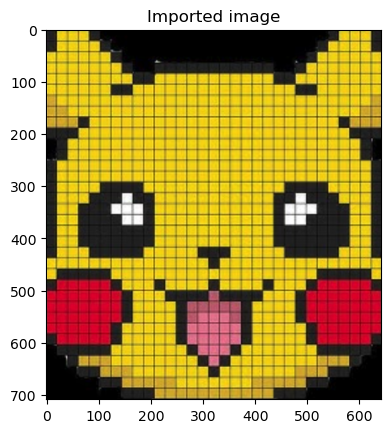

In [3]:
# Images in OpenCV are read using imread() function. The function takes the image names as the input.
img = cv.imread('1.png')

# For displaying images in OpenCV, it is recommended you use the defined function 'display_image()' 
# Generally cv.imshow() function is used for displaying images. But it won't work in Jupyter notebook.
display_image(img, title='Imported image')

In [4]:
print(img)

[[[13 16 16]
  [22 25 26]
  [29 32 33]
  ...
  [24 24 24]
  [24 24 24]
  [25 25 25]]

 [[14 15 16]
  [23 24 25]
  [30 31 32]
  ...
  [23 23 23]
  [24 24 24]
  [25 25 25]]

 [[15 15 16]
  [24 24 25]
  [31 31 32]
  ...
  [24 24 24]
  [25 25 25]
  [26 26 26]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


In [5]:
img.shape

(709, 642, 3)

As you can see images in OpenCV are essentially multi-dimension lists. $709$ represent the height of the image in terms of no. of pixels (essentially no. of rows for the list), $642$ is the image width (essentially no. of columns for the list) and $3$ denotes that each cell contains 3 values namely RGB. 

In [6]:
# To print the (200, 200)^th pixel's value
print("Pixel's value", img[200, 200])

Pixel's value [ 18 208 246]


In [7]:
# To print the pixel value of all the pixels in the range (200, m) where 0<=m<200
print("\nPixel value of all the pixels in the range (200, m)", img[200, 0:200])


Pixel value of all the pixels in the range (200, m) [[ 19  19  19]
 [ 30  31  30]
 [ 37  39  39]
 [ 33  35  35]
 [ 29  31  31]
 [ 28  29  29]
 [ 28  29  29]
 [ 28  30  30]
 [ 30  31  31]
 [ 31  32  31]
 [ 31  32  31]
 [ 30  32  31]
 [ 31  32  31]
 [ 31  34  33]
 [ 33  35  34]
 [ 34  37  35]
 [ 35  38  36]
 [ 34  36  35]
 [ 26  28  27]
 [ 19  20  19]
 [ 21  23  22]
 [ 28  30  28]
 [ 32  35  34]
 [ 31  33  32]
 [ 29  32  30]
 [ 29  32  31]
 [ 30  32  31]
 [ 30  33  31]
 [ 30  33  32]
 [ 31  33  31]
 [ 30  33  30]
 [ 30  32  30]
 [ 30  32  29]
 [ 32  33  30]
 [ 35  35  32]
 [ 36  33  31]
 [ 36  31  30]
 [ 37  30  29]
 [ 37  29  28]
 [ 36  29  27]
 [ 33  28  26]
 [ 30  26  24]
 [ 28  26  23]
 [ 31  30  26]
 [ 35  33  30]
 [ 35  33  30]
 [ 33  32  30]
 [ 33  32  30]
 [ 37  34  34]
 [ 40  39  37]
 [ 37  36  35]
 [ 31  32  30]
 [ 27  29  26]
 [ 27  29  27]
 [ 28  29  28]
 [ 33  32  32]
 [ 39  36  37]
 [ 40  37  38]
 [ 33  28  30]
 [ 10  22  25]
 [ 14  45  51]
 [ 27  84  92]
 [ 40 127 138]
 [

Leaving the starting limit unspecified e.g., img[200, : 100] is equivalent to img[200, 0:100]. Similarly, not specifying the last element 

In [8]:
# Printing all the pixel value for first column in the range (m, 0) where 0<=m<150
print(img[:150,0])

[[ 13  16  16]
 [ 14  15  16]
 [ 15  15  16]
 [ 17  15  16]
 [ 21  17  19]
 [ 23  20  22]
 [ 22  20  21]
 [ 19  19  20]
 [ 18  18  19]
 [ 19  19  20]
 [ 20  22  21]
 [ 19  22  21]
 [ 19  22  20]
 [ 18  22  19]
 [ 19  24  19]
 [ 21  23  20]
 [ 20  22  20]
 [ 19  19  20]
 [ 20  17  21]
 [ 24  19  24]
 [ 26  22  27]
 [ 22  18  24]
 [ 15  13  19]
 [ 12  10  16]
 [ 16  15  21]
 [ 21  20  26]
 [ 22  20  26]
 [ 23  20  25]
 [ 23  20  24]
 [ 24  20  23]
 [ 21  21  22]
 [ 19  20  21]
 [ 15  19  19]
 [ 12  19  16]
 [ 11  21  17]
 [ 15  20  19]
 [ 19  21  19]
 [ 23  21  21]
 [ 27  20  22]
 [ 30  19  21]
 [ 21  19  23]
 [ 15  23  25]
 [ 10  26  31]
 [ 11  38  42]
 [ 28  72  76]
 [ 55 109 116]
 [ 55 116 124]
 [ 47 112 122]
 [ 41 110 121]
 [ 37 112 124]
 [ 38 114 127]
 [ 34 114 127]
 [ 32 113 124]
 [ 29 111 123]
 [ 27 111 123]
 [ 27 111 123]
 [ 29 112 126]
 [ 30 115 129]
 [ 33 117 132]
 [ 34 119 134]
 [ 39 121 133]
 [ 34 110 119]
 [ 27  95 100]
 [ 23  86  87]
 [ 29  91  90]
 [ 30  96  97]
 [ 33 103 

## a) Reading and displaying images

Write python code to read an image of your choice and display only the left half of the image.


In [ ]:
# Write your code here

## b) Flipping the image

Write a Python function to flip an image horizontally and vertically.

In [ ]:
def flip_image(img, vertical=False, horizontal=False):
    if(vertical):
        # Write your code here
        
    if(horizonatal):
        # Write your code here

Now that you're a little familiar with the digital-representation of an image and some image-handling in Python, you will be tasked with manipulating these images. 

As a Note: Images in OpenCV are essentially numpy arrays and therefore support all numpy operations. This might come in handy later.

# Convolutions

A common operation used in Image Processing is the convolution operation (kind of like a fancy multiplication). You may refer to this [link](https://betterexplained.com/articles/intuitive-convolution/) for an intuitive introduction to the convolution operation.

Imagine you have a quadratic polynomial $ax^2 + bx + c$ represented as using the coefficient list C = [c, b, a], where C[i] = coeff of $x^i$. If we multiply this quadratic polynomial by another quadratic polynomial $dx^2 + ex + f$, then we obtain:

$$
h(x) = (f_2x^2 + f_1x + f_0)(g_2x^2 + g_1x + g_0) = (f_2g_2)x^4 + (f_2g_1 + f_1g_2)x^3 + (f_0g_2 + f_2g_0)x^2 + (f_1g_0 + f_0g_1)x + f_0g_0
$$

Now consider, $$h(x) = \sum_{k=0}^{4} h_k x^k$$
$$h_k = \sum_{i=0}^{k} f_i g_{k-i}$$ 


Just try plugging in some values to verify the same. Now consider the case of $h_2$.
$$h_2 = f[2] \ast g[2] = [f_0 f_1 f_2] \ast [g_0 g_1 g_2]$$

This turns out to be same as flipping the second list $g[2]$ and doing an element-wise multiplication and summing all the element of the obtained list. Here $\ast$ stands for the convolution operation.

Now, one question that might arise in your mind is why to give name to such an operation. The reason is first it occurs frequently in Image Processing and CNNs and second Fast Fourier Tranform which reduces the time complexity of the convolution operation from $\mathcal{O}(n^2)$ to $\mathcal{O}(n\log{}n)$.

## c) Convolution operation

Write a Python function which multiplies two polynomials (given as coefficient lists) using convolution operation defined above.

In [ ]:
def convolve_polynomial(poly1, poly2):
    # Write your code here

# Image Convolution



## d) 2D Convolution

Write a python function which implements the convolution operation on an image given the kernel. Please refer to this [video](https://www.youtube.com/watch?v=8rrHTtUzyZA) by Grant Sanderson to learn about 2D convolutions and how it is connected to the context of blurring images.

In [ ]:
def 2D_convolution(img, kernel):
    # Write your code here

## e) Blurring Images

Write a python function which blur an image using the Gaussian Blur kernel.

In [ ]:
def blurImage(img, kernel_size)
    # Write your code here (Preferably use the 2D_convolution() function from the previous part)

## f) Sharpening images

Write a python function which sharpens an image. Try to find the associated kernel for sharpening images.

In [ ]:
def sharpenImage(img, kernel_size)
    # Write your code here (Preferably use the 2D_convolution() function from the previous part)

## Bonus: Edge detection

Write a Python function to do Edge detection. For the theory part regarding how edge detection works, you may refer to the first 5 videos of this [playlist](https://www.youtube.com/playlist?list=PL2zRqk16wsdqXEMpHrc4Qnb5rA1Cylrhx).

In [ ]:
# Write your code here